In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/my_drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/my_drive/


In [3]:
df = pd.read_csv("/content/my_drive/My Drive/Assignment Files/doc_reports.csv")

In [4]:
df.head()

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [5]:
df.columns

Index(['Unnamed: 0', 'user_id', 'result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties', 'sub_result'],
      dtype='object')

In [6]:
df.result.unique()

array(['consider', 'clear'], dtype=object)

In [7]:
df.properties[0]

"{'gender': 'Male', 'nationality': 'IRL', 'document_type': 'passport', 'date_of_expiry': '2019-08-12', 'issuing_country': 'IRL'}"

In [8]:
df2 = pd.read_csv("/content/my_drive/My Drive/Assignment Files/facial_similarity_reports.csv")

In [9]:
df2.head()

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [10]:
df3 = df[df.properties !='{}'].copy()

In [11]:
df3.count()

Unnamed: 0                            150306
user_id                               150306
result                                150306
visual_authenticity_result            150290
image_integrity_result                150305
face_detection_result                 150261
image_quality_result                  150305
created_at                            150306
supported_document_result             150303
conclusive_document_quality_result     95217
colour_picture_result                  95222
data_validation_result                142974
data_consistency_result                92229
data_comparison_result                  2548
attempt_id                            150306
police_record_result                  144557
compromised_document_result            45506
properties                            150306
sub_result                            150306
dtype: int64

In [12]:
prop = list(df3.properties.values)

In [13]:
prop[0]

"{'gender': 'Male', 'nationality': 'IRL', 'document_type': 'passport', 'date_of_expiry': '2019-08-12', 'issuing_country': 'IRL'}"

In [14]:
prop_update = []
import ast
for i in range(len(prop)):
  print(prop[i])
  prop_update.append(ast.literal_eval(prop[i]))

Streaming output truncated to the last 5000 lines.
{'gender': 'Male', 'document_type': 'driving_licence', 'date_of_expiry': '2018-04-16', 'issuing_country': 'GBR'}
{'gender': 'Female', 'nationality': 'IRL', 'document_type': 'passport', 'date_of_expiry': '2022-05-21', 'issuing_country': 'IRL'}
{'gender': 'Male', 'document_type': 'driving_licence', 'date_of_expiry': '2017-10-17', 'issuing_country': 'GBR'}
{'issuing_date': '2016-07-27', 'document_type': 'driving_licence', 'date_of_expiry': '2031-07-27', 'issuing_country': 'FRA'}
{'gender': 'Male', 'nationality': 'ESP', 'document_type': 'national_identity_card', 'date_of_expiry': '2022-03-30', 'issuing_country': 'ESP'}
{'gender': 'Male', 'nationality': 'HUN', 'document_type': 'national_identity_card', 'date_of_expiry': '2019-02-25', 'issuing_country': 'HUN'}
{'gender': 'Male', 'issuing_date': '2014-10', 'document_type': 'national_identity_card', 'issuing_country': 'FRA'}
{'gender': 'Male', 'nationality': 'POL', 'document_type': 'national_i

In [15]:
prop_update[0]

{'date_of_expiry': '2019-08-12',
 'document_type': 'passport',
 'gender': 'Male',
 'issuing_country': 'IRL',
 'nationality': 'IRL'}

In [16]:

def properties_Clear(key):
  nationality =[]
  if key == "nationality":
    for i in range(len(prop_update)):
      if "nationality" in prop_update[i].keys():
        nationality.append(prop_update[i]["nationality"])
        
      else:
        nationality.append("")
    return nationality

  elif key == "gender":
    gender = []
    for i in range(len(prop_update)):
      if "gender" in prop_update[i].keys():
        if prop_update[i]["gender"] == None or prop_update[i]["gender"] == "8":
          gender.append("") 
        else:
          gender.append(prop_update[i]["gender"].upper())  
        
      else:
        gender.append("")
    return gender

  elif key == "document_type":
    document_type = []
    for i in range(len(prop_update)):
      if "document_type" in prop_update[i].keys():
        document_type.append(prop_update[i]["document_type"])
        
      else:
        document_type.append("")

    return document_type
  elif key == "date_of_expiry":
    date_of_expiry = []
    for i in range(len(prop_update)):
      if "date_of_expiry" in prop_update[i].keys():
        date_of_expiry.append(prop_update[i]["date_of_expiry"])
        
      else:
        date_of_expiry.append("")

    return date_of_expiry

  elif key == "issuing_country":
    issuing_country = []
    for i in range(len(prop_update)):
      if "issuing_country" in prop_update[i].keys():
        issuing_country.append(prop_update[i]["issuing_country"])
        
      else:
        issuing_country.append("")

    return issuing_country


            

In [17]:
gender = properties_Clear("gender")
nationality = properties_Clear("nationality")
document_type = properties_Clear("document_type")
issuing_country = properties_Clear("issuing_country")
date_of_expiry = properties_Clear("date_of_expiry")

In [18]:
pd.unique(gender)

array(['MALE', 'FEMALE', ''], dtype=object)

In [19]:
pd.unique(nationality)

array(['IRL', '', 'ITA', 'POL', 'BRA', 'ESP', 'LTU', 'GBR', 'SVK', 'TUN',
       'PHL', 'HUN', 'CHN', 'DNK', 'BEL', 'CZE', 'GHA', 'DEU', 'FRA',
       'ROU', 'IND', 'NLD', 'GRC', 'RUS', 'CHE', 'SVN', 'PRT', 'IRN',
       'SWE', 'LVA', 'UKR', '<<<', 'LBN', 'AUS', 'FIN', 'XXX', 'CYP',
       'ARG', 'BGR', 'AUT', 'TWN', 'NZL', 'JOR', 'CAN', 'ZAF', 'COL',
       'CIV', 'JPN', 'USA', 'CHL', 'SEN', 'MEX', 'TUR', 'GEO', 'ISR',
       'MAR', 'BGD', 'BIH', 'BHR', 'BEN', 'IDN', 'MYS', 'EGY', 'AGO',
       'PRY', 'VNM', 'SRB', 'KAZ', 'NIC', 'SGP', 'KOR', 'CMR', 'PAK',
       'NPL', 'THA', 'RKS', 'MKD', 'BLR', 'DZA', 'VEN', 'KEN', 'HRV',
       'TGO', 'MLT', 'NOR', 'NAM', 'KGZ', 'ALB', 'EST', 'PER', 'COM',
       'NGA', 'HKG', 'GBN', 'ECU', 'LUX', 'ZWE', 'URY', 'MDA', 'CUB',
       'GMB', 'KHM', 'AZE', 'GTM', 'LBY', 'GIN', 'COD', 'ISL', 'LKA',
       'GBO', 'XXB', 'CPV', None, 'OMN', 'SYR', 'KWT', 'G5R', 'GAB',
       'MUS', 'ROL', 'JAM', 'SI<', 'HTI', 'ARE', 'UGA', 'SAU', 'UZB',
       'SI', 'ARM

In [20]:
pd.unique(document_type)

array(['passport', 'driving_licence', 'national_identity_card',
       'residence_permit', 'tax_id', 'voter_id', '', 'work_permit',
       'birth_certificate'], dtype=object)

In [21]:
pd.unique(issuing_country)

array(['IRL', 'GBR', 'ITA', 'FRA', 'POL', 'BRA', 'ESP', 'LTU', 'GRC',
       'CYP', 'SVK', 'RUS', 'TUN', 'PHL', 'USA', 'HUN', 'CHN', 'PRT',
       'DNK', 'BEL', 'CZE', 'GIB', 'GHA', 'DEU', 'ROU', 'IND', 'NLD',
       'LUX', 'CHE', 'SVN', 'AUT', 'IRN', 'SWE', 'HKG', 'LVA', 'UKR',
       'IDN', 'BGR', 'LBN', 'AUS', 'FIN', 'LIE', 'ARG', 'TWN', 'JEY',
       'NZL', 'JOR', 'CAN', 'ZAF', 'COL', 'ARE', 'CIV', 'JPN', 'CHL',
       'SEN', 'MEX', 'TUR', 'GEO', 'ISR', 'MAR', 'BGD', 'BIH', 'MYS',
       'BHR', 'BEN', 'SGP', 'AGO', 'PRY', 'VNM', 'SRB', 'VEN', 'KAZ',
       'NIC', 'KOR', 'CMR', 'PAK', 'NPL', 'THA', 'RKS', 'MKD', 'BLR',
       'DZA', 'KEN', 'HRV', 'TGO', 'MLT', 'NOR', 'GGY', 'NAM', 'KGZ',
       'ALB', 'EST', 'COM', 'ECU', 'URY', 'PER', 'CUB', 'GMB', 'IMN',
       'LBY', 'AZE', 'GIN', 'COD', 'ISL', 'EGY', 'CPV', 'OMN', 'SYR',
       'KWT', '', 'LKA', 'MDA', 'JAM', 'SI<', 'HTI', 'NGA', 'UGA', 'SAU',
       'UZB', 'ARM', 'SLV', 'HND', 'Svn', 'ZMB', 'DOM', 'LCA', 'IRQ',
       'MUS', 'M

In [22]:
date_of_expiry
pd.unique(date_of_expiry)

array(['2019-08-12', '2023-02-28', '2018-06-09', ..., '2016-07-31',
       '2014-12-03', '2016-12-30'], dtype=object)

In [23]:
print("gender \n",len(gender))
print("nationality \n",len(nationality))
print("document_type \n",len(document_type))
print("issuing_country \n",len(issuing_country))
print("date_of_expiry \n",len(date_of_expiry))


gender 
 150306
nationality 
 150306
document_type 
 150306
issuing_country 
 150306
date_of_expiry 
 150306


In [24]:
df3["gender"] = gender
df3["nationality"] = nationality
df3["document_type"] = document_type
df3["issuing_country"] = issuing_country
df3["date_of_expiry"] = date_of_expiry


In [25]:
df3.head()

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result,gender,nationality,document_type,issuing_country,date_of_expiry
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,MALE,IRL,passport,IRL,2019-08-12
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,FEMALE,,driving_licence,GBR,2023-02-28
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,MALE,ITA,passport,ITA,2018-06-09
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,MALE,,national_identity_card,FRA,
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,MALE,POL,national_identity_card,POL,2019-05-29


In [26]:
df3.to_csv("updated_records.csv")

In [27]:
df3.count()

Unnamed: 0                            150306
user_id                               150306
result                                150306
visual_authenticity_result            150290
image_integrity_result                150305
face_detection_result                 150261
image_quality_result                  150305
created_at                            150306
supported_document_result             150303
conclusive_document_quality_result     95217
colour_picture_result                  95222
data_validation_result                142974
data_consistency_result                92229
data_comparison_result                  2548
attempt_id                            150306
police_record_result                  144557
compromised_document_result            45506
properties                            150306
sub_result                            150306
gender                                150306
nationality                           150287
document_type                         150306
issuing_co

# Male clear vs consider

In [28]:
"""
clear_person = df3.result == "clear"
gender_male = df3.gender == "MALE"
male_and_clear = df3[clear_person & gender_male]
len(male_and_clear)
#consider_person = df3.result == "consider"
gender_male = df3[df3.gender == "MALE"]
#male_and_consider = df3[consider_person & gender_male]
len(male_and_consider)"""

'\nclear_person = df3.result == "clear"\ngender_male = df3.gender == "MALE"\nmale_and_clear = df3[clear_person & gender_male]\nlen(male_and_clear)\n#consider_person = df3.result == "consider"\ngender_male = df3[df3.gender == "MALE"]\n#male_and_consider = df3[consider_person & gender_male]\nlen(male_and_consider)'

In [29]:

gender_male = df3[df3.gender == "MALE"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


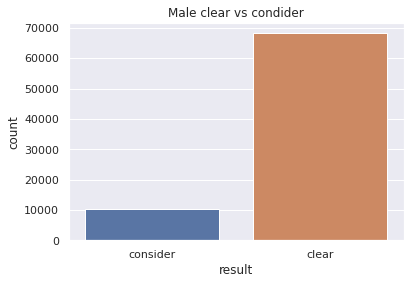

In [30]:
import seaborn as sns
sns.set(style="darkgrid")
plt.title("Male clear vs condider")
ax = sns.countplot(x="result", data=gender_male)


# Female Clear vs consider

In [31]:
gender_female = df3[df3.gender == "FEMALE"]

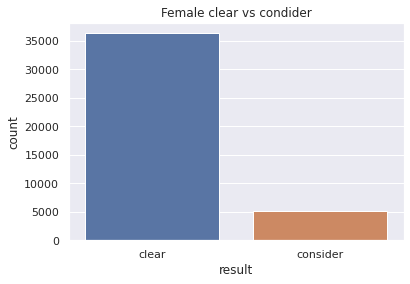

In [32]:
sns.set(style="darkgrid")
plt.title("Female clear vs condider")
ax = sns.countplot(x="result", data=gender_female)

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150306 entries, 0 to 176403
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          150306 non-null  int64 
 1   user_id                             150306 non-null  object
 2   result                              150306 non-null  object
 3   visual_authenticity_result          150290 non-null  object
 4   image_integrity_result              150305 non-null  object
 5   face_detection_result               150261 non-null  object
 6   image_quality_result                150305 non-null  object
 7   created_at                          150306 non-null  object
 8   supported_document_result           150303 non-null  object
 9   conclusive_document_quality_result  95217 non-null   object
 10  colour_picture_result               95222 non-null   object
 11  data_validation_result              142

In [34]:
df3.nationality.fillna("",inplace=True)

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150306 entries, 0 to 176403
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          150306 non-null  int64 
 1   user_id                             150306 non-null  object
 2   result                              150306 non-null  object
 3   visual_authenticity_result          150290 non-null  object
 4   image_integrity_result              150305 non-null  object
 5   face_detection_result               150261 non-null  object
 6   image_quality_result                150305 non-null  object
 7   created_at                          150306 non-null  object
 8   supported_document_result           150303 non-null  object
 9   conclusive_document_quality_result  95217 non-null   object
 10  colour_picture_result               95222 non-null   object
 11  data_validation_result              142

In [36]:
df3[df3.nationality==""]="Un Known"

In [37]:
len(pd.unique(df3.nationality))

209

# Data Clean For top consider country

In [38]:
unique_countries = list(pd.unique(df3.nationality))

In [39]:
def ten_consid_countr(a):
  b = df3.result == "consider"
  c = df3.nationality == a
  d = df3[b & c]
  return len(d)

In [40]:
consider_country = {}
for i in range(len(unique_countries)):
  consider_country[unique_countries[i]]= ten_consid_countr(unique_countries[i])
  print(consider_country)

{'IRL': 1069}
{'IRL': 1069, 'Un Known': 0}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315, 'POL': 585}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315, 'POL': 585, 'BRA': 31}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315, 'POL': 585, 'BRA': 31, 'ESP': 691}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315, 'POL': 585, 'BRA': 31, 'ESP': 691, 'LTU': 953}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315, 'POL': 585, 'BRA': 31, 'ESP': 691, 'LTU': 953, 'GBR': 2146}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315, 'POL': 585, 'BRA': 31, 'ESP': 691, 'LTU': 953, 'GBR': 2146, 'SVK': 38}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315, 'POL': 585, 'BRA': 31, 'ESP': 691, 'LTU': 953, 'GBR': 2146, 'SVK': 38, 'TUN': 20}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315, 'POL': 585, 'BRA': 31, 'ESP': 691, 'LTU': 953, 'GBR': 2146, 'SVK': 38, 'TUN': 20, 'PHL': 27}
{'IRL': 1069, 'Un Known': 0, 'ITA': 315, 'POL': 585, 'BRA': 31, 'ESP': 691, 'LTU': 953, 'GBR': 2146, 'SVK': 38, 'TUN': 20, 'PHL': 27, 'HUN': 99}
{'IRL': 1069, 'Un Kn

In [41]:
#sorted_consider_contr = {}
sorted_consider_contr_k = []
sorted_consider_contr_v = []
sort_orders = sorted(consider_country.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
  if i[1]>=190:
    sorted_consider_contr_k.append(i[0])
    sorted_consider_contr_v.append(i[1])
    #sorted_consider_contr[i[0]]=i[1]
    print(i[0], i[1])
  else:
    break

GBR 2146
FRA 1153
IRL 1069
LTU 953
ESP 691
POL 585
PRT 531
DEU 403
ITA 315
NLD 191


In [42]:
def ten_clear_countr(a):
  b = df3.result == "clear"
  c = df3.nationality == a
  d = df3[b & c]
  return len(d)

In [43]:
clear_country = {}
for i in range(len(unique_countries)):
  clear_country[unique_countries[i]]= ten_clear_countr(unique_countries[i])
  print(clear_country)

{'IRL': 5018}
{'IRL': 5018, 'Un Known': 0}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825, 'POL': 5558}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825, 'POL': 5558, 'BRA': 273}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825, 'POL': 5558, 'BRA': 273, 'ESP': 7072}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825, 'POL': 5558, 'BRA': 273, 'ESP': 7072, 'LTU': 6616}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825, 'POL': 5558, 'BRA': 273, 'ESP': 7072, 'LTU': 6616, 'GBR': 10506}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825, 'POL': 5558, 'BRA': 273, 'ESP': 7072, 'LTU': 6616, 'GBR': 10506, 'SVK': 351}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825, 'POL': 5558, 'BRA': 273, 'ESP': 7072, 'LTU': 6616, 'GBR': 10506, 'SVK': 351, 'TUN': 85}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825, 'POL': 5558, 'BRA': 273, 'ESP': 7072, 'LTU': 6616, 'GBR': 10506, 'SVK': 351, 'TUN': 85, 'PHL': 232}
{'IRL': 5018, 'Un Known': 0, 'ITA': 1825, 'POL': 5558, 'BRA': 273, 'ESP': 7072, 'LTU': 6616, 'GBR': 10506, 'SVK': 351, 'TU

In [44]:
sorted_clear_contr_k = []
sorted_clear_contr_v = []
sort_orders = sorted(clear_country.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
  if i[1]>=1700:
    sorted_clear_contr_k.append(i[0])
    sorted_clear_contr_v.append(i[1])
    #sorted_clear_contr[i[0]]=i[1]
    print(i[0], i[1])
  else:
    break

GBR 10506
ESP 7072
LTU 6616
POL 5558
FRA 5536
IRL 5018
PRT 3925
DEU 2739
ITA 1825
CHE 1719


# Top 10 countries clear wise

In [45]:
ypos = np.arange(len(sorted_clear_contr_k))

<BarContainer object of 10 artists>

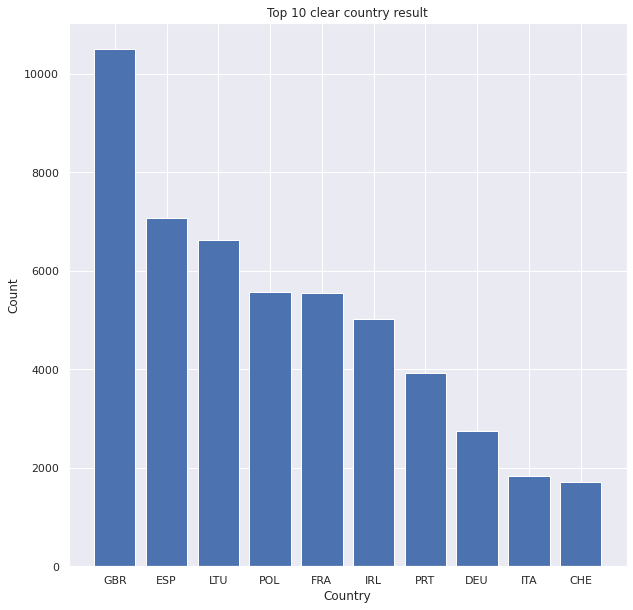

In [57]:

plt.figure(figsize=(10,10))
plt.title("Top 10 clear country result")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(ypos,sorted_clear_contr_k)
plt.bar(ypos,sorted_clear_contr_v)

# Top 10 countries consider wise

<BarContainer object of 10 artists>

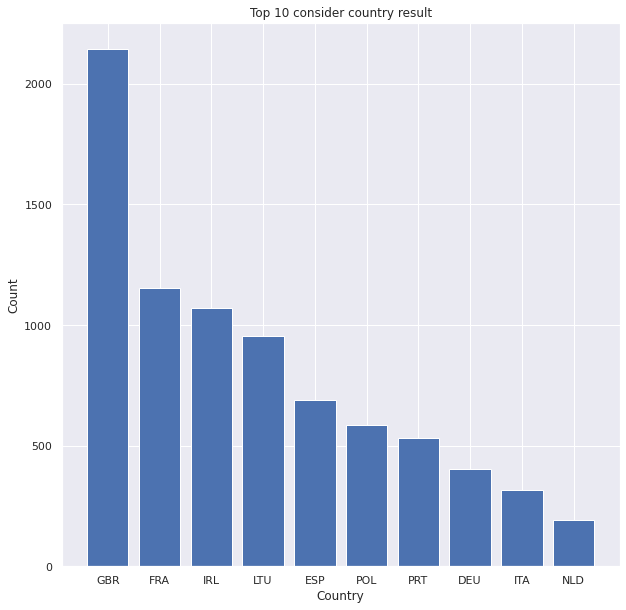

In [58]:

plt.figure(figsize=(10,10))
plt.title("Top 10 consider country result")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(ypos,sorted_consider_contr_k)
plt.bar(ypos,sorted_consider_contr_v)

In [48]:
df3.head()

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result,gender,nationality,document_type,issuing_country,date_of_expiry
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,MALE,IRL,passport,IRL,2019-08-12
1,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,MALE,ITA,passport,ITA,2018-06-09
3,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known,Un Known
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,MALE,POL,national_identity_card,POL,2019-05-29


In [51]:
police_clear = df3[df3.police_record_result=="clear"]
police_consider = df3[df3.police_record_result=="consider"]

# Polic Record Result clear wise

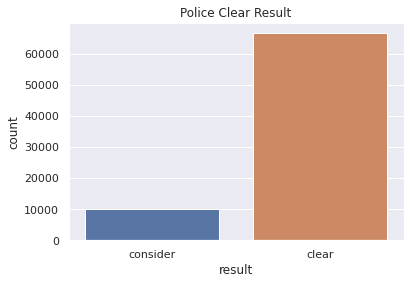

In [55]:
import seaborn as sns
sns.set(style="darkgrid")
plt.title("Police Clear Result")
ax = sns.countplot(x="result", data=police_clear)

# Police Record Result consider wise

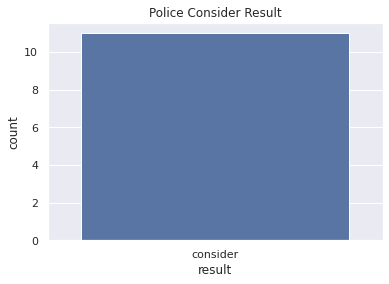

In [56]:
import seaborn as sns
sns.set(style="darkgrid")
plt.title("Police Consider Result")
ax = sns.countplot(x="result", data=police_consider)

In [61]:
df3.columns

Index(['Unnamed: 0', 'user_id', 'result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties', 'sub_result', 'gender',
       'nationality', 'document_type', 'issuing_country', 'date_of_expiry'],
      dtype='object')